In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/dataset-for-home-prices-in-dhaka-city/homeprices.csv')

In [3]:
df

,area,price
0,2600,55000
1,3000,56500
2,3200,61000
3,3600,68000
4,4000,72000
5,5000,71000
6,2500,40000
7,2700,38000
8,1200,17000
9,1000,17900


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    10 non-null     int64
 1   price   10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


In [5]:
df.shape

(10, 2)

In [6]:
df.describe()

,area,price
count,10.000000,10.000000
mean,2880.000000,49640.000000
std,1201.665511,20546.327058
min,1000.000000,17000.000000
25%,2525.000000,38500.000000
50%,2850.000000,55750.000000
75%,3500.000000,66250.000000
max,5000.000000,72000.000000


In [7]:
df.isnull().sum()

area     0
price    0
dtype: int64

**Vidulization**

Text(0.5, 1.0, 'Dhaka House Price')

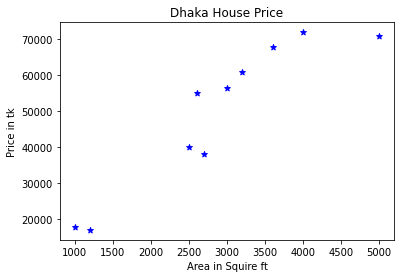

In [8]:
plt.scatter(df['area'],df['price'],marker='*',color='b')
plt.xlabel('Area in Squire ft')
plt.ylabel('Price in tk')
plt.title('Dhaka House Price')


In [9]:
x = df[['area']]
x

,area
0,2600
1,3000
2,3200
3,3600
4,4000
5,5000
6,2500
7,2700
8,1200
9,1000


In [10]:
y = df['price']
y

0    55000
1    56500
2    61000
3    68000
4    72000
5    71000
6    40000
7    38000
8    17000
9    17900
Name: price, dtype: int64

In [11]:
import sklearn
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=1)

In [13]:
x_train

,area
4,4000
0,2600
3,3600
1,3000
7,2700
8,1200
5,5000


In [14]:
y_test

2    61000
9    17900
6    40000
Name: price, dtype: int64

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
model = LinearRegression()

In [17]:
model.fit(x_train,y_train)

LinearRegression()

In [18]:
y_test

2    61000
9    17900
6    40000
Name: price, dtype: int64

In [19]:
model.predict(x_test)

array([54577.95521897, 21242.92064537, 43971.35330919])

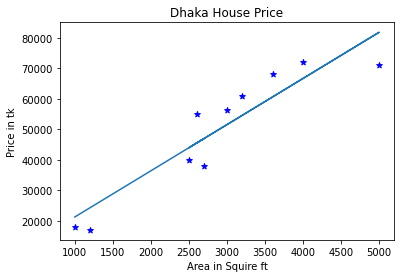

In [20]:
plt.scatter(df['area'],df['price'],marker='*',color='b')
plt.xlabel('Area in Squire ft')
plt.ylabel('Price in tk')
plt.title('Dhaka House Price')
plt.plot(df.area,model.predict(df[['area']]))

In [21]:
model.predict([[2000]])

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([36395.20908792])

In [22]:
model.predict([[4000]])

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([66699.785973])

> ***Internal Math Behind this predictiion***

In [23]:
#y = mx + c 
model.coef_

array([15.15228844])

In [24]:
model.intercept_

6090.632202831752

In [25]:
y = 15.15228844 * 4000 + 6090.632202831752
y

66699.78596283175

In [26]:
model.score(x_test,y_test)*100

92.65996389865244